# Bike Sharing 

#### Importing the libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [67]:
# Rewading the dataset
bike = pd.read_csv(r"C:\Users\VED\Downloads\UpGrad Assesments\Bike_sharing\day.csv")

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
bike.shape

(730, 16)

In [69]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [70]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [71]:
# checking the Null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [72]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [73]:
bike['season'].describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [74]:
## Mapping the season variable 

bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [75]:
bike.season

0      spring
1      spring
2      spring
3      spring
4      spring
5      spring
6      spring
7      spring
8      spring
9      spring
10     spring
11     spring
12     spring
13     spring
14     spring
15     spring
16     spring
17     spring
18     spring
19     spring
20     spring
21     spring
22     spring
23     spring
24     spring
25     spring
26     spring
27     spring
28     spring
29     spring
        ...  
700    winter
701    winter
702    winter
703    winter
704    winter
705    winter
706    winter
707    winter
708    winter
709    winter
710    winter
711    winter
712    winter
713    winter
714    winter
715    winter
716    winter
717    winter
718    winter
719    spring
720    spring
721    spring
722    spring
723    spring
724    spring
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [76]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

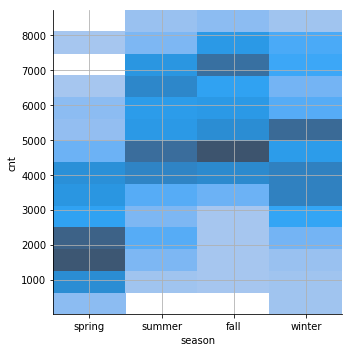

In [77]:
sns.displot(data=bike, x='season', y='cnt')

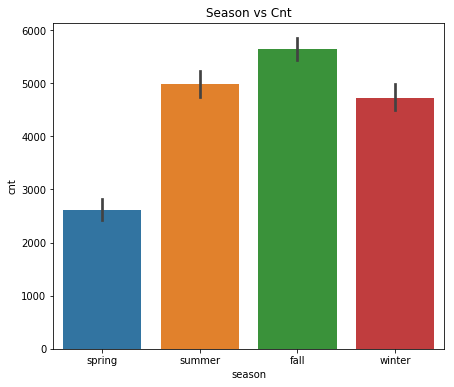

In [78]:
plt.figure(figsize=(7,6))
sns.barplot(data=bike, x= 'season', y='cnt')
plt.title("Season vs Cnt")
plt.show()

All the seasons have a different effects. Fall have a high bar comparing to others.

In [79]:
## analysing the weakdays
bike.weekday.describe()

count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [80]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

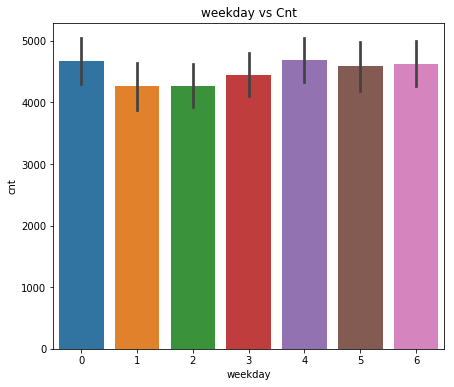

In [81]:
plt.figure(figsize=(7,6))
sns.barplot(data=bike, x= 'weekday', y='cnt')
plt.title("weekday vs Cnt")
plt.show()

In weekday we can see that the days are in numeric form. first day of week starts form the Zero. So 0 is sunday and 1 is monday which is weekday.

In [82]:
## analysing the year

bike.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [83]:
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

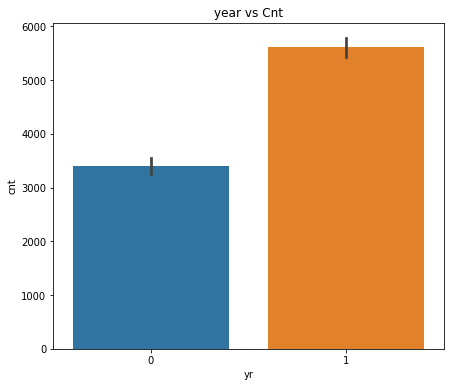

In [84]:
plt.figure(figsize=(7,6))
sns.barplot(data=bike, x= 'yr', y='cnt')
plt.title("year vs Cnt")
plt.show()

We can infer that 2019 is high, 2019 have more rides comparing to 2018. In 2019 customers has increased. 

In [85]:
## Mapping the wheatherist

bike['weathersit']=bike['weathersit'].map({1:'Clear', 2: 'Mist', 3: 'Light', 4:'Heavy'})

In [86]:
bike.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
Clear    463
Mist     246
Light     21
Name: weathersit, dtype: int64

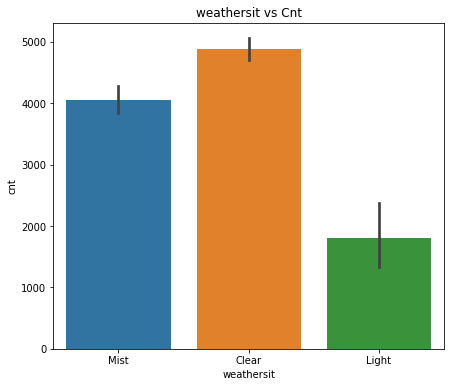

In [87]:
plt.figure(figsize=(7,6))
sns.barplot(data=bike, x= 'weathersit', y='cnt')
plt.title("weathersit vs Cnt")
plt.show()

In [88]:
np.corrcoef(bike['temp'], bike['atemp'])

array([[1.        , 0.99169618],
       [0.99169618, 1.        ]])

we checked the correlation coefficient between the `temp` and `atemp`. There is high corelation between them so we can drop one.

In [89]:
## Dropping the "atemp"
bike.drop("atemp", axis=1, inplace=True)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [90]:
bike.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [91]:
#mapping the variables

bike["weekday"] = bike['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


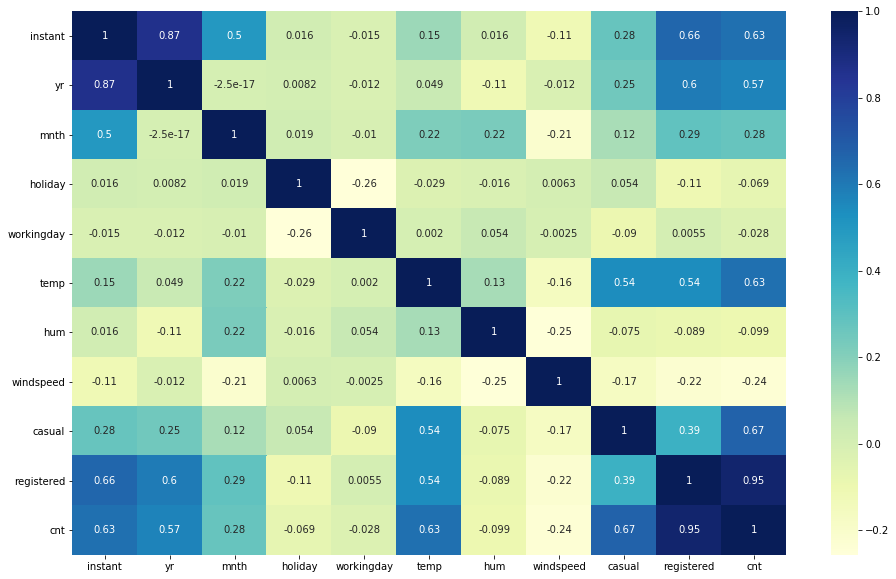

In [92]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

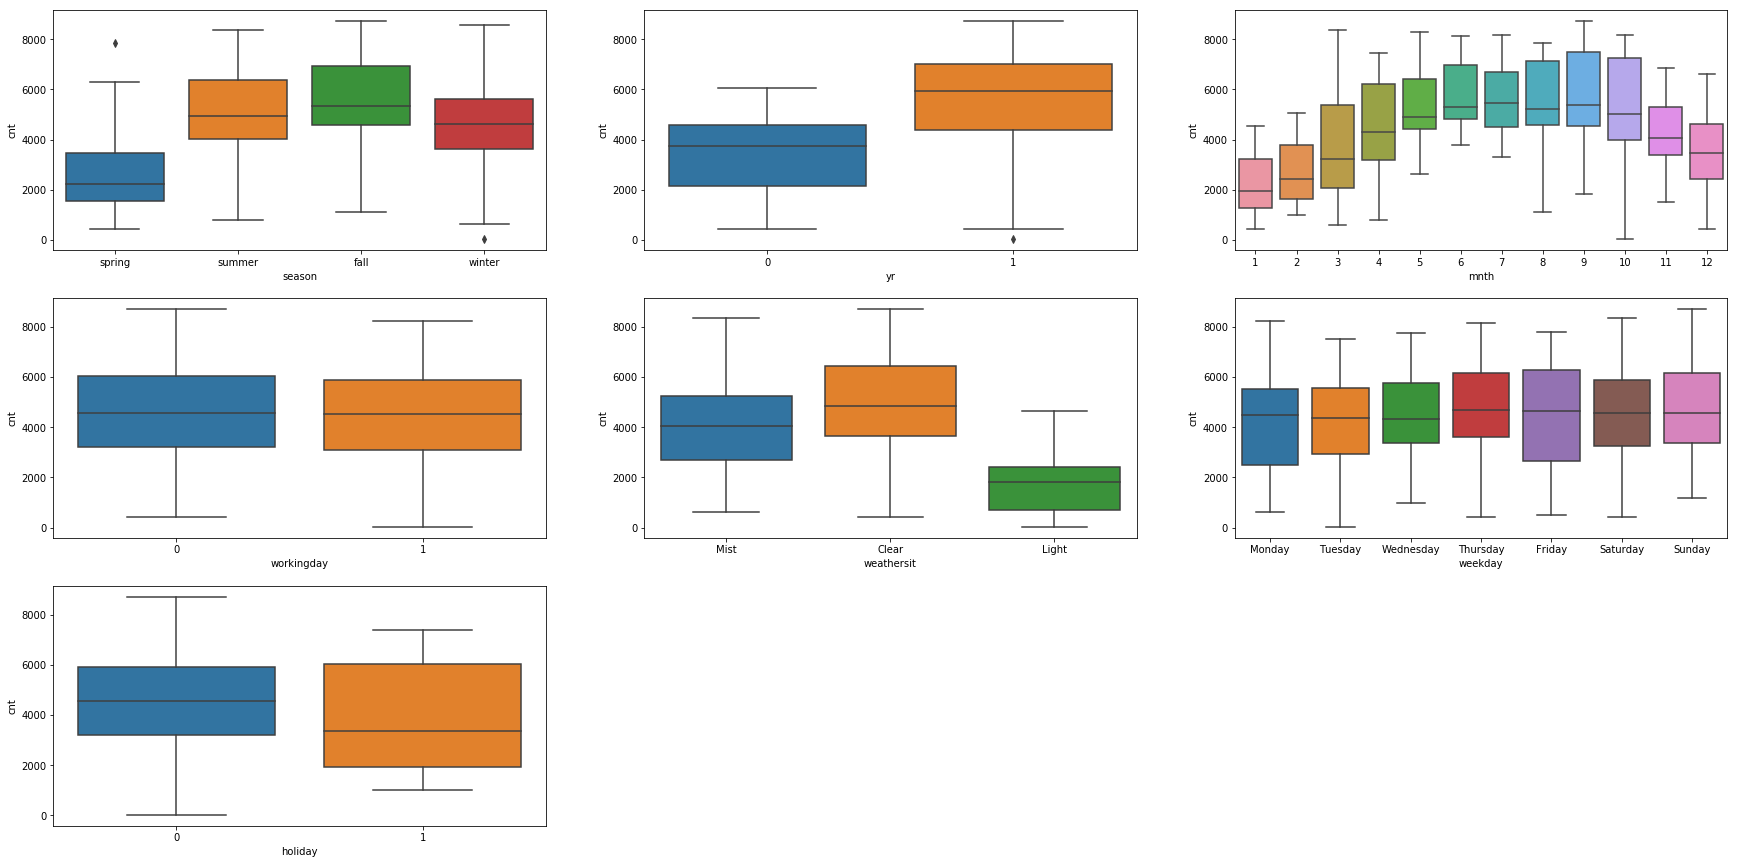

In [93]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

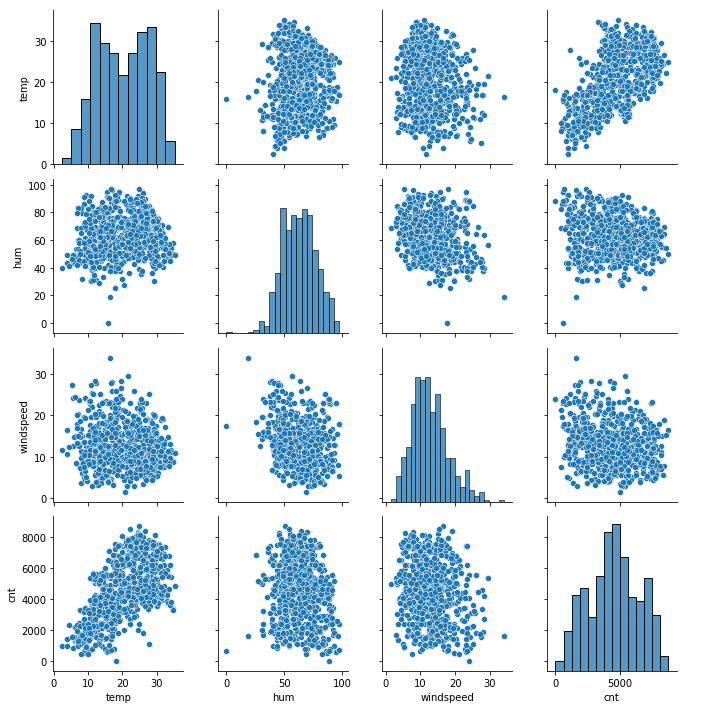

In [94]:
## Plotting the numeric variables 

sns.pairplot(bike, vars=['temp','hum','windspeed',"cnt"])
plt.show()

In [95]:
## create a dummy variables

season_1=pd.get_dummies(bike['season'],drop_first=True)
weather_1=pd.get_dummies(bike['weathersit'],drop_first=True)
weekday_1=pd.get_dummies(bike['weekday'],drop_first=True)
month_1=pd.get_dummies(bike['mnth'],drop_first=True)

In [96]:
season_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [97]:
bike=pd.concat([bike,season_1],axis=1)
bike=pd.concat([bike,weather_1],axis=1)
bike=pd.concat([bike,weekday_1],axis=1)
bike=pd.concat([bike,month_1],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Light         730 non-null uint8
Mist          730 non-null uint8
Monday        730 non-null uint8
Saturday      730 non-null uint8
Sunday        730 non-null uint8
Thursday      730 non-null uint8
Tuesday       730 non-null uint8
Wednesday     730 non-null uint8
2             730 non-null 

In [98]:
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['mnth'],axis=1,inplace=True)
bike.drop('instant', axis=1, inplace=True)
bike.drop('dteday',axis=1, inplace=True)
bike.drop('casual',axis=1, inplace=True)
bike.drop('registered',axis=1, inplace=True)

bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
## Splitting the data using train_test_split 
bike_test, bike_train= train_test_split(bike, train_size=0.7,test_size=0.3, random_state=100)

In [100]:
print(bike_train.shape)
print(bike_test.shape)

(219, 29)
(510, 29)


In [101]:
## Scaling the numerical data.
scaler = MinMaxScaler()

In [102]:
## creating the list of numeric variables
numeric_var = ['temp','hum','windspeed','cnt']

In [103]:
bike_train[numeric_var] = scaler.fit_transform(bike_train[numeric_var])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
## X_train Y_train
y_train = bike_train.pop("cnt")
X_train = bike_train

In [105]:
y_train.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

### `Feature Selection`

In [106]:
## Feature selection 

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [107]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',       'Mist',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  4,            7,            8],
      dtype='object')

In [108]:
### MODEL BUILDING 1 

# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     43.01
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.85e-67
Time:                        21:56:06   Log-Likelihood:                 221.72
No. Observations:                 219   AIC:                            -385.4
Df Residuals:                     190   BIC:                            -287.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4395      0.128      3.446      0.001       0.188       0.691
yr             0.2558      0.014     18.112      0.000       0.228       0.284
holiday       -0.0761      0.099     -0.768      0.443      -0.271       0.119
workingday    -0.0231      0.107     -0.215      0.830      -0.235       0.189
temp           0.3248      0.071      4.554      0.000       0.184       0.465
hum           -0.1731      0.053     -3.289      0.001      -0.277      -0.069
windspeed     -0.0867      0.041     -2.135      0.034      -0.167      -0.007
spring        -0.2214      0.049     -4.546      0.000      -0.317      -0.125
summer        -0.0633      0.041     -1.543      0.124      -0.144       0.018
winter         0.0392      0.041      0.961      0.338      -0.041       0.120
Light         -0.1495      0.051     -2.942      0.004      -0.250      -0.049
Mist          -0.0380      0.020     -1.933      0.055      -0.077       0.001
Monday        -0.0385      0.026     -1.460      0.146      -0.091       0.014
Saturday      -0.0322      0.110     -0.293      0.770      -0.249       0.184
Sunday        -0.0128      0.108     -0.119      0.906      -0.225       0.200
Thursday      -0.0084      0.026     -0.321      0.749      -0.060       0.043
Tuesday       -0.0448      0.027     -1.658      0.099      -0.098       0.008
Wednesday     -0.0320      0.025     -1.269      0.206      -0.082       0.018
2              0.0244      0.032      0.762      0.447      -0.039       0.087
3              0.0876      0.042      2.098      0.037       0.005       0.170
4              0.0444      0.061      0.726      0.469      -0.076       0.165
5              0.0987      0.066      1.497      0.136      -0.031       0.229
6              0.0596      0.067      0.886      0.377      -0.073       0.192
7             -0.0298      0.073     -0.411      0.682      -0.173       0.113
8             -0.0139      0.072     -0.193      0.847      -0.156       0.128
9              0.0721      0.059      1.214      0.226      -0.045       0.189
10             0.0766      0.054      1.414      0.159      -0.030       0.183
11            -0.0772      0.052     -1.476      0.142      -0.180       0.026
12            -0.0651      0.039     -1.677      0.095      -0.142       0.011
==============================================================================
Omnibus:                       27.156   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.298
Skew:                          -0.679   Prob(JB):                     8.84e-11
Kurtosis:                       4.797   Cond. No.                         63.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [109]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,workingday,56.17
3,temp,43.82
4,hum,20.16
12,Saturday,14.65
13,Sunday,13.30
22,7,12.52
6,spring,12.04
7,summer,10.39
21,6,10.28
20,5,8.97


In [110]:
X_train.drop('Sunday', axis=1, inplace=True)

In [111]:
## MODEL BUILDING II
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     44.83
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.75e-68
Time:                        21:56:08   Log-Likelihood:                 221.71
No. Observations:                 219   AIC:                            -387.4
Df Residuals:                     191   BIC:                            -292.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      0.070      6.120      0.000       0.289       0.564
yr             0.2559      0.014     18.192      0.000       0.228       0.284
holiday       -0.0655      0.043     -1.530      0.128      -0.150       0.019
workingday    -0.0107      0.025     -0.430      0.668      -0.060       0.038
temp           0.3255      0.071      4.597      0.000       0.186       0.465
hum           -0.1739      0.052     -3.335      0.001      -0.277      -0.071
windspeed     -0.0869      0.040     -2.151      0.033      -0.167      -0.007
spring        -0.2213      0.049     -4.556      0.000      -0.317      -0.126
summer        -0.0632      0.041     -1.545      0.124      -0.144       0.017
winter         0.0391      0.041      0.962      0.337      -0.041       0.119
Light         -0.1488      0.050     -2.953      0.004      -0.248      -0.049
Mist          -0.0377      0.019     -1.940      0.054      -0.076       0.001
Monday        -0.0381      0.026     -1.460      0.146      -0.090       0.013
Saturday      -0.0195      0.023     -0.847      0.398      -0.065       0.026
Thursday      -0.0080      0.026     -0.309      0.757      -0.059       0.043
Tuesday       -0.0442      0.027     -1.666      0.097      -0.097       0.008
Wednesday     -0.0313      0.025     -1.275      0.204      -0.080       0.017
2              0.0242      0.032      0.760      0.448      -0.039       0.087
3              0.0873      0.042      2.100      0.037       0.005       0.169
4              0.0436      0.061      0.719      0.473      -0.076       0.163
5              0.0985      0.066      1.499      0.136      -0.031       0.228
6              0.0590      0.067      0.882      0.379      -0.073       0.191
7             -0.0301      0.072     -0.416      0.678      -0.173       0.113
8             -0.0142      0.072     -0.198      0.843      -0.156       0.128
9              0.0719      0.059      1.214      0.226      -0.045       0.189
10             0.0765      0.054      1.417      0.158      -0.030       0.183
11            -0.0771      0.052     -1.479      0.141      -0.180       0.026
12            -0.0651      0.039     -1.683      0.094      -0.141       0.011
==============================================================================
Omnibus:                       27.138   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.444
Skew:                          -0.677   Prob(JB):                     8.22e-11
Kurtosis:                       4.805   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,43.53
4,hum,17.32
2,workingday,9.61
21,7,9.31
7,summer,9.30
20,6,8.50
19,5,8.08
8,winter,6.98
5,windspeed,6.83
18,4,6.71


In [113]:
X_train.drop(8, axis=1, inplace=True)

In [114]:
## MODEL BUILDING III
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     46.79
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           4.06e-69
Time:                        21:56:10   Log-Likelihood:                 221.69
No. Observations:                 219   AIC:                            -389.4
Df Residuals:                     192   BIC:                            -297.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4193      0.058      7.179      0.000       0.304       0.535
yr             0.2564      0.014     18.589      0.000       0.229       0.284
holiday       -0.0653      0.043     -1.529      0.128      -0.150       0.019
workingday    -0.0105      0.025     -0.424      0.672      -0.059       0.038
temp           0.3179      0.059      5.373      0.000       0.201       0.435
hum           -0.1721      0.051     -3.358      0.001      -0.273      -0.071
windspeed     -0.0858      0.040     -2.149      0.033      -0.165      -0.007
spring        -0.2154      0.038     -5.647      0.000      -0.291      -0.140
summer        -0.0612      0.040     -1.548      0.123      -0.139       0.017
winter         0.0426      0.037      1.163      0.246      -0.030       0.115
Light         -0.1495      0.050     -2.980      0.003      -0.248      -0.051
Mist          -0.0381      0.019     -1.976      0.050      -0.076   -7.52e-05
Monday        -0.0381      0.026     -1.465      0.145      -0.089       0.013
Saturday      -0.0189      0.023     -0.830      0.407      -0.064       0.026
Thursday      -0.0076      0.026     -0.294      0.769      -0.058       0.043
Tuesday       -0.0446      0.026     -1.688      0.093      -0.097       0.008
Wednesday     -0.0312      0.025     -1.275      0.204      -0.080       0.017
2              0.0264      0.030      0.880      0.380      -0.033       0.085
3              0.0915      0.036      2.549      0.012       0.021       0.162
4              0.0515      0.046      1.126      0.261      -0.039       0.142
5              0.1076      0.047      2.273      0.024       0.014       0.201
6              0.0696      0.041      1.708      0.089      -0.011       0.150
7             -0.0173      0.033     -0.524      0.601      -0.083       0.048
9              0.0815      0.034      2.407      0.017       0.015       0.148
10             0.0830      0.043      1.927      0.055      -0.002       0.168
11            -0.0722      0.046     -1.579      0.116      -0.162       0.018
12            -0.0619      0.035     -1.772      0.078      -0.131       0.007
==============================================================================
Omnibus:                       27.059   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.221
Skew:                          -0.676   Prob(JB):                     9.19e-11
Kurtosis:                       4.800   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,18.20
4,hum,17.29
2,workingday,9.59
7,summer,9.27
5,windspeed,6.69
8,winter,6.68
6,spring,5.14
19,5,4.82
18,4,4.66
20,6,3.95


In [116]:
X_train.drop('Thursday', axis=1, inplace=True)

In [117]:
## MODEL BUILDING IV
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     48.89
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           5.98e-70
Time:                        21:56:12   Log-Likelihood:                 221.64
No. Observations:                 219   AIC:                            -391.3
Df Residuals:                     193   BIC:                            -303.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4183      0.058      7.191      0.000       0.304       0.533
yr             0.2569      0.014     18.794      0.000       0.230       0.284
holiday       -0.0693      0.040     -1.716      0.088      -0.149       0.010
workingday    -0.0143      0.021     -0.676      0.500      -0.056       0.027
temp           0.3184      0.059      5.396      0.000       0.202       0.435
hum           -0.1717      0.051     -3.360      0.001      -0.273      -0.071
windspeed     -0.0848      0.040     -2.137      0.034      -0.163      -0.007
spring        -0.2159      0.038     -5.679      0.000      -0.291      -0.141
summer        -0.0606      0.039     -1.538      0.126      -0.138       0.017
winter         0.0423      0.037      1.157      0.249      -0.030       0.114
Light         -0.1514      0.050     -3.053      0.003      -0.249      -0.054
Mist          -0.0386      0.019     -2.010      0.046      -0.076      -0.001
Monday        -0.0345      0.023     -1.507      0.133      -0.080       0.011
Saturday      -0.0189      0.023     -0.834      0.405      -0.064       0.026
Tuesday       -0.0407      0.023     -1.785      0.076      -0.086       0.004
Wednesday     -0.0277      0.021     -1.303      0.194      -0.070       0.014
2              0.0273      0.030      0.918      0.360      -0.031       0.086
3              0.0919      0.036      2.567      0.011       0.021       0.162
4              0.0519      0.046      1.138      0.257      -0.038       0.142
5              0.1073      0.047      2.274      0.024       0.014       0.200
6              0.0688      0.041      1.696      0.092      -0.011       0.149
7             -0.0165      0.033     -0.501      0.617      -0.081       0.048
9              0.0815      0.034      2.415      0.017       0.015       0.148
10             0.0835      0.043      1.947      0.053      -0.001       0.168
11            -0.0718      0.046     -1.575      0.117      -0.162       0.018
12            -0.0622      0.035     -1.786      0.076      -0.131       0.007
==============================================================================
Omnibus:                       26.918   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.990
Skew:                          -0.672   Prob(JB):                     1.03e-10
Kurtosis:                       4.797   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,18.20
4,hum,17.29
7,summer,9.26
2,workingday,6.87
5,windspeed,6.67
8,winter,6.66
6,spring,5.07
18,5,4.82
17,4,4.66
19,6,3.93


In [119]:
X_train.drop(7, axis=1, inplace=True)

In [120]:
## MODEL BUILDING V
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     51.11
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           9.34e-71
Time:                        21:56:15   Log-Likelihood:                 221.49
No. Observations:                 219   AIC:                            -393.0
Df Residuals:                     194   BIC:                            -308.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4126      0.057      7.248      0.000       0.300       0.525
yr             0.2567      0.014     18.824      0.000       0.230       0.284
holiday       -0.0700      0.040     -1.738      0.084      -0.149       0.009
workingday    -0.0135      0.021     -0.642      0.522      -0.055       0.028
temp           0.3101      0.057      5.483      0.000       0.199       0.422
hum           -0.1691      0.051     -3.333      0.001      -0.269      -0.069
windspeed     -0.0812      0.039     -2.084      0.038      -0.158      -0.004
spring        -0.2124      0.037     -5.695      0.000      -0.286      -0.139
summer        -0.0594      0.039     -1.513      0.132      -0.137       0.018
winter         0.0446      0.036      1.235      0.218      -0.027       0.116
Light         -0.1537      0.049     -3.118      0.002      -0.251      -0.057
Mist          -0.0395      0.019     -2.076      0.039      -0.077      -0.002
Monday        -0.0359      0.023     -1.578      0.116      -0.081       0.009
Saturday      -0.0185      0.023     -0.820      0.413      -0.063       0.026
Tuesday       -0.0403      0.023     -1.771      0.078      -0.085       0.005
Wednesday     -0.0286      0.021     -1.355      0.177      -0.070       0.013
2              0.0293      0.029      0.999      0.319      -0.029       0.087
3              0.0955      0.035      2.732      0.007       0.027       0.164
4              0.0579      0.044      1.319      0.189      -0.029       0.144
5              0.1149      0.045      2.576      0.011       0.027       0.203
6              0.0776      0.036      2.128      0.035       0.006       0.149
9              0.0893      0.030      2.979      0.003       0.030       0.148
10             0.0889      0.041      2.142      0.033       0.007       0.171
11            -0.0681      0.045     -1.516      0.131      -0.157       0.021
12            -0.0594      0.034     -1.731      0.085      -0.127       0.008
==============================================================================
Omnibus:                       27.226   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.782
Skew:                          -0.686   Prob(JB):                     1.14e-10
Kurtosis:                       4.771   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now All the varibles have P-Value less then 0.05  

In [121]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,hum,17.27
3,temp,12.83
7,summer,9.26
2,workingday,6.86
8,winter,6.63
5,windspeed,6.59
6,spring,5.05
17,4,4.38
18,5,4.28
21,10,3.51


In [122]:
# droping the variable
X_train.drop('hum', axis=1, inplace=True)

In [123]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,summer,9.05
3,temp,7.34
2,workingday,6.76
7,winter,6.57
4,windspeed,6.31
16,4,4.36
5,spring,4.28
17,5,4.25
20,10,3.41
18,6,3.14


In [124]:
#dropping the summer var
X_train.drop('summer', axis=1, inplace=True)

In [125]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,7.24
2,workingday,6.68
6,winter,6.51
4,windspeed,6.29
5,spring,3.99
19,10,3.40
20,11,3.10
21,12,2.29
10,Saturday,2.12
13,2,2.10


In [126]:
X_train.drop('temp', axis=1, inplace=True)

In [127]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,winter,6.46
3,windspeed,5.01
2,workingday,4.91
4,spring,3.44
18,10,3.38
19,11,3.10
20,12,2.28
12,2,2.10
0,yr,2.03
9,Saturday,1.82


In [128]:
# dropping the winter var
X_train.drop('winter', axis=1, inplace=True)

In [129]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,windspeed,5.00
2,workingday,4.81
4,spring,3.09
0,yr,2.03
11,2,2.02
8,Saturday,1.82
10,Wednesday,1.71
6,Mist,1.69
9,Tuesday,1.52
7,Monday,1.51


In [130]:
## MODEL BUILDING V
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.03
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           8.15e-65
Time:                        21:56:23   Log-Likelihood:                 196.93
No. Observations:                 219   AIC:                            -351.9
Df Residuals:                     198   BIC:                            -280.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5732      0.030     18.953      0.000       0.514       0.633
yr             0.2686      0.015     18.458      0.000       0.240       0.297
holiday       -0.0567      0.045     -1.275      0.204      -0.145       0.031
workingday    -0.0096      0.023     -0.413      0.680      -0.055       0.036
windspeed     -0.0513      0.041     -1.257      0.210      -0.132       0.029
spring        -0.3374      0.025    -13.675      0.000      -0.386      -0.289
Light         -0.2514      0.047     -5.354      0.000      -0.344      -0.159
Mist          -0.0819      0.016     -5.065      0.000      -0.114      -0.050
Monday        -0.0473      0.025     -1.891      0.060      -0.097       0.002
Saturday      -0.0122      0.025     -0.489      0.626      -0.062       0.037
Tuesday       -0.0622      0.025     -2.528      0.012      -0.111      -0.014
Wednesday     -0.0336      0.023     -1.447      0.150      -0.080       0.012
2              0.0042      0.032      0.134      0.894      -0.058       0.067
3              0.0395      0.035      1.123      0.263      -0.030       0.109
4             -0.0840      0.029     -2.896      0.004      -0.141      -0.027
5              0.0083      0.029      0.283      0.778      -0.050       0.066
6              0.0418      0.028      1.479      0.141      -0.014       0.098
9              0.0499      0.030      1.683      0.094      -0.009       0.108
10             0.0463      0.030      1.527      0.128      -0.013       0.106
11            -0.1705      0.032     -5.389      0.000      -0.233      -0.108
12            -0.1318      0.030     -4.468      0.000      -0.190      -0.074
==============================================================================
Omnibus:                       14.968   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.598
Skew:                          -0.443   Prob(JB):                     2.04e-05
Kurtosis:                       4.257   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# dropping the 2 var
X_train.drop(2, axis=1, inplace=True)

In [132]:
## MODEL BUILDING VI
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     50.80
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.14e-65
Time:                        21:56:24   Log-Likelihood:                 196.92
No. Observations:                 219   AIC:                            -353.8
Df Residuals:                     199   BIC:                            -286.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5737      0.030     19.197      0.000       0.515       0.633
yr             0.2687      0.015     18.507      0.000       0.240       0.297
holiday       -0.0572      0.044     -1.292      0.198      -0.144       0.030
workingday    -0.0096      0.023     -0.414      0.679      -0.055       0.036
windspeed     -0.0519      0.040     -1.283      0.201      -0.132       0.028
spring        -0.3356      0.021    -16.089      0.000      -0.377      -0.295
Light         -0.2516      0.047     -5.374      0.000      -0.344      -0.159
Mist          -0.0818      0.016     -5.077      0.000      -0.114      -0.050
Monday        -0.0470      0.025     -1.891      0.060      -0.096       0.002
Saturday      -0.0120      0.025     -0.482      0.630      -0.061       0.037
Tuesday       -0.0624      0.024     -2.550      0.012      -0.111      -0.014
Wednesday     -0.0335      0.023     -1.446      0.150      -0.079       0.012
3              0.0379      0.033      1.149      0.252      -0.027       0.103
4             -0.0843      0.029     -2.924      0.004      -0.141      -0.027
5              0.0079      0.029      0.272      0.786      -0.050       0.065
6              0.0414      0.028      1.476      0.141      -0.014       0.097
9              0.0495      0.029      1.683      0.094      -0.009       0.107
10             0.0459      0.030      1.525      0.129      -0.013       0.105
11            -0.1709      0.031     -5.442      0.000      -0.233      -0.109
12            -0.1331      0.028     -4.749      0.000      -0.188      -0.078
==============================================================================
Omnibus:                       15.053   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.596
Skew:                          -0.448   Prob(JB):                     2.04e-05
Kurtosis:                       4.251   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# Dropping the 5 var
X_train.drop(5, axis=1, inplace=True)

In [134]:
## MODEL BUILDING VII
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     53.87
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.58e-66
Time:                        21:56:25   Log-Likelihood:                 196.88
No. Observations:                 219   AIC:                            -355.8
Df Residuals:                     200   BIC:                            -291.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5762      0.028     20.276      0.000       0.520       0.632
yr             0.2691      0.014     18.680      0.000       0.241       0.297
holiday       -0.0568      0.044     -1.288      0.199      -0.144       0.030
workingday    -0.0102      0.023     -0.444      0.658      -0.055       0.035
windspeed     -0.0516      0.040     -1.280      0.202      -0.131       0.028
spring        -0.3378      0.019    -17.578      0.000      -0.376      -0.300
Light         -0.2513      0.047     -5.381      0.000      -0.343      -0.159
Mist          -0.0815      0.016     -5.082      0.000      -0.113      -0.050
Monday        -0.0463      0.025     -1.877      0.062      -0.095       0.002
Saturday      -0.0125      0.025     -0.503      0.616      -0.061       0.036
Tuesday       -0.0621      0.024     -2.547      0.012      -0.110      -0.014
Wednesday     -0.0335      0.023     -1.448      0.149      -0.079       0.012
3              0.0368      0.033      1.126      0.261      -0.028       0.101
4             -0.0869      0.027     -3.190      0.002      -0.141      -0.033
6              0.0390      0.027      1.470      0.143      -0.013       0.091
9              0.0469      0.028      1.690      0.093      -0.008       0.102
10             0.0434      0.029      1.520      0.130      -0.013       0.100
11            -0.1734      0.030     -5.782      0.000      -0.233      -0.114
12            -0.1347      0.027     -4.937      0.000      -0.189      -0.081
==============================================================================
Omnibus:                       15.367   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.952
Skew:                          -0.458   Prob(JB):                     1.71e-05
Kurtosis:                       4.251   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
X_train.drop("workingday", axis=1, inplace=True)

In [136]:
## MODEL BUILDING VIII
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     57.26
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.26e-67
Time:                        21:56:25   Log-Likelihood:                 196.77
No. Observations:                 219   AIC:                            -357.5
Df Residuals:                     201   BIC:                            -296.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5690      0.023     24.336      0.000       0.523       0.615
yr             0.2689      0.014     18.713      0.000       0.241       0.297
holiday       -0.0473      0.038     -1.230      0.220      -0.123       0.029
windspeed     -0.0510      0.040     -1.267      0.207      -0.130       0.028
spring        -0.3372      0.019    -17.627      0.000      -0.375      -0.299
Light         -0.2550      0.046     -5.564      0.000      -0.345      -0.165
Mist          -0.0817      0.016     -5.100      0.000      -0.113      -0.050
Monday        -0.0499      0.023     -2.148      0.033      -0.096      -0.004
Saturday      -0.0061      0.020     -0.302      0.763      -0.046       0.034
Tuesday       -0.0657      0.023     -2.863      0.005      -0.111      -0.020
Wednesday     -0.0372      0.022     -1.731      0.085      -0.080       0.005
3              0.0368      0.033      1.130      0.260      -0.027       0.101
4             -0.0864      0.027     -3.181      0.002      -0.140      -0.033
6              0.0400      0.026      1.519      0.130      -0.012       0.092
9              0.0484      0.027      1.761      0.080      -0.006       0.103
10             0.0435      0.028      1.526      0.129      -0.013       0.100
11            -0.1717      0.030     -5.783      0.000      -0.230      -0.113
12            -0.1345      0.027     -4.939      0.000      -0.188      -0.081
==============================================================================
Omnibus:                       14.965   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.701
Skew:                          -0.441   Prob(JB):                     1.94e-05
Kurtosis:                       4.265   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#dropping the saturday var
X_train.drop("Saturday", axis=1, inplace=True)

In [138]:
## MODEL BUILDING IX
# add a constant
X_train_sm  = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

#check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     61.11
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.97e-68
Time:                        21:56:26   Log-Likelihood:                 196.72
No. Observations:                 219   AIC:                            -359.4
Df Residuals:                     202   BIC:                            -301.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5679      0.023     24.679      0.000       0.523       0.613
yr             0.2687      0.014     18.755      0.000       0.240       0.297
holiday       -0.0469      0.038     -1.223      0.223      -0.123       0.029
windspeed     -0.0520      0.040     -1.299      0.195      -0.131       0.027
spring        -0.3372      0.019    -17.666      0.000      -0.375      -0.300
Light         -0.2533      0.045     -5.581      0.000      -0.343      -0.164
Mist          -0.0819      0.016     -5.128      0.000      -0.113      -0.050
Monday        -0.0481      0.022     -2.145      0.033      -0.092      -0.004
Tuesday       -0.0640      0.022     -2.887      0.004      -0.108      -0.020
Wednesday     -0.0354      0.021     -1.720      0.087      -0.076       0.005
3              0.0362      0.032      1.116      0.266      -0.028       0.100
4             -0.0863      0.027     -3.186      0.002      -0.140      -0.033
6              0.0394      0.026      1.502      0.135      -0.012       0.091
9              0.0482      0.027      1.758      0.080      -0.006       0.102
10             0.0437      0.028      1.538      0.126      -0.012       0.100
11            -0.1717      0.030     -5.797      0.000      -0.230      -0.113
12            -0.1348      0.027     -4.970      0.000      -0.188      -0.081
==============================================================================
Omnibus:                       14.874   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.498
Skew:                          -0.440   Prob(JB):                     2.15e-05
Kurtosis:                       4.258   Cond. No.                         9.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
## checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,windspeed,3.58
0,yr,1.90
3,spring,1.86
5,Mist,1.64
10,4,1.35
8,Wednesday,1.33
15,12,1.29
11,6,1.26
12,9,1.26
13,10,1.22


We checked all the variables Now we will go for Residual analysis

### Residual Analysis

In [140]:
## Residual Analysis - Predicting the values

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

184    0.395964
535    0.863976
299    0.506654
221    0.544508
152    0.571802
404    0.476838
198    0.507094
171    0.505879
512    0.702832
200    0.555865
509    0.821077
559    0.738810
109    0.452707
467    0.732789
339    0.152088
589    0.757679
222    0.549167
40     0.204449
682    0.641594
453    0.775771
606    0.829411
265    0.526825
510    0.813398
19     0.126013
117    0.360473
423    0.476919
614    0.865149
163    0.534714
630    0.810257
191    0.498352
         ...   
396    0.477491
239    0.466823
729    0.201322
366    0.376723
155    0.446159
150    0.556192
78     0.178572
9      0.168902
142    0.422868
363    0.081116
75     0.242296
29     0.159920
169    0.450980
723    0.181171
399    0.356350
100    0.324633
634    0.788194
522    0.858255
421    0.411400
721    0.301894
615    0.768911
58     0.078320
646    0.740987
287    0.532474
641    0.785918
400    0.333385
702    0.646451
127    0.497045
640    0.792618
72     0.216470
Length: 219, dtype: floa

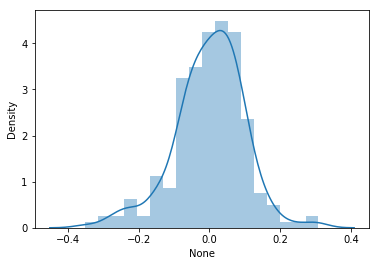

In [141]:
# Calculating the residual 
res = (y_train - y_train_pred)
sns.distplot(res)

### Prediction and Evaluation on Test set

In [142]:
## Creating the list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

# fit and transform the data
bike_test[num_vars]= scaler.fit_transform(bike_test[num_vars])

In [143]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
## Creating the x and y test

y_test = bike_test.pop('cnt')
X_test = bike_test

In [145]:
col1=X_train.columns
X_test=X_test[col1]

## Adding a new constant variable
X_test_sm1 = sm.add_constant(X_test)
X_test_sm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 17 columns):
const        510 non-null float64
yr           510 non-null int64
holiday      510 non-null int64
windspeed    510 non-null float64
spring       510 non-null uint8
Light        510 non-null uint8
Mist         510 non-null uint8
Monday       510 non-null uint8
Tuesday      510 non-null uint8
Wednesday    510 non-null uint8
3            510 non-null uint8
4            510 non-null uint8
6            510 non-null uint8
9            510 non-null uint8
10           510 non-null uint8
11           510 non-null uint8
12           510 non-null uint8
dtypes: float64(2), int64(2), uint8(13)
memory usage: 26.4 KB


In [146]:
X_test_sm1.shape

(510, 17)

In [147]:
## Predicting the model 
y_pred = lr_model.predict(X_test_sm1)

Text(0,0.5,'y_pred')

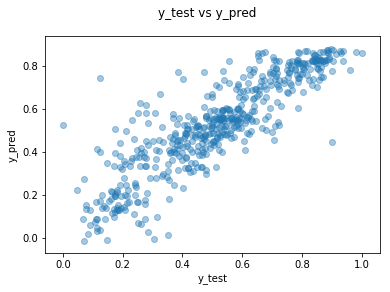

In [148]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred, alpha=.4)
fig.suptitle("y_test vs y_pred")
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label

Here we predicted the model and it is good to predict the demand of bikes. It is able to explain the change in demand.

### Calculating the $R^{2}$ 

In [149]:
## R^2 value for test
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.745949703325246

we got the R2 which is 0.74